In [11]:
import numpy as np

<h2>Activation Function</h2>

<b>ReLU</b> - Rectified Linear Activation Function - Takes a single number as input, return 0 if the input is negative, or the input if the input is positive.<br>
<b>TANH</b> - <br>
<b>Sigmoid</b> - <br>
<b>Linear</b> - <br>

In [ ]:
### Obs:
slope = 2 * input_data * error

<h2>FOWARD PROPAGATION - Prediction

In [ ]:
### FOWARD PROPAGATION - Prediction

input_data = np.array([2, 3])
weights = {'node_0' : np.array([1, 1]),
'node_1' : np.array([-1, 1]),
'output' : np.array([2, -1]),
}
node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

hidden_layer_values = np.array([node_0_value, node_1_value])
print (hidden_layer_values)

output = hidden_layer_values * weights['output'].sum()
print(output)

In [29]:
### Predict with ONE Hidden Layer

input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights = {'node_0': [2,  4],
           'node_1': [4, -5],
           'output': [2,  7]}


def relu(input):
    '''Calculate the value for the output of the relu function'''    
    output = max(0, input)        
    return(output)


def predict_with_network(input_data_row, weights):
    
    node_0_input = (input_data_row * weights['node_0']).sum()                                  # Calculate node 0 value
    node_0_output = relu(node_0_input)
    
    node_1_input = (input_data_row * weights['node_1']).sum()                                  # Calculate node 1 value
    node_1_output = relu(node_1_input)
    
    hidden_layer_outputs = np.array([node_0_output, node_1_output])                            # Put node values into array
        
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()                    # Calculate model output
    model_output = relu(input_to_final_layer)
    
    return(model_output)

results = []
for input_data_row in input_data:    
    results.append(predict_with_network(input_data_row, weights))                              # Append prediction to results

print(results)
        

[52, 63, 0, 148]


In [31]:
### Predict with TWO Hidden Layer

input_data = np.array([3, 5])
weights = {'node_0_0': [ 2,  4],
           'node_0_1': [ 4, -5],
           'node_1_0': [-1,  2],
           'node_1_1': [ 1,  2],
           'output'  : [ 2,  7]}


def predict_with_network(input_data, weights):
    
    node_0_0_input = (input_data * weights['node_0_0']).sum()               # Calculate node 0 in the first hidden layer
    node_0_0_output = relu(node_0_0_input)
    
    node_0_1_input = (input_data * weights['node_0_1']).sum()               # Calculate node 1 in the first hidden layer
    node_0_1_output = relu(node_0_1_input)
    
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])         # Put node values into array
        
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()         # Calculate node 0 in the second hidden layer
    node_1_0_output = relu(node_1_0_input)
    
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()         # Calculate node 1 in the second hidden layer
    node_1_1_output = relu(node_1_1_input)
    
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])         # Put node values into array
    
    model_output = (hidden_1_outputs * weights['output'])                   # Calculate model output without relu()
        
    return(model_output)

output = predict_with_network(input_data)
print(output)


[  0 182]


<b>Calculating slopes

In [39]:
### Calculating slopes & Improving weights

weights = np.array([1, 2])
input_data = np.array([3, 4])
target = 6
learning_rate = 0.01

preds = (weights * input_data).sum()                         # Calculate the predictions
error = preds - target                                       # Calculate the error
print('Original error: ', error)                             # Print the original error

slope = 2 * input_data * error                               # Calculate the slope
print('Slope: ', slope)                                      # Print the slope

weights_updated = weights - (learning_rate * slope)          # Update the weights
preds_updated = (weights_updated * input_data).sum()         # Get updated predictions

error_updated = preds_updated - target                       # Calculate updated error
print('Updated error: ', error_updated)                      # Print the updated error


Original error:  5
Slope:  [30 40]
Updated error:  2.5


Original error:  7


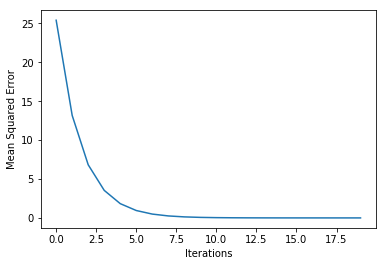

In [53]:
### Iteratively update weights

def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

input_data    = np.array([1, 2, 3])
weights       = np.array([0, 2, 1])
target        = 0
learning_rate = 0.01
n_updates     = 20
mse_hist      = []
preds_hist    = []

preds = (weights * input_data).sum()                         # Calculate the predictions
error = preds - target                                       # Calculate the error
print('Original error: ', error)                             # Print the original error

# Iterate over the number of updates
for i in range(n_updates):    
    slope = get_slope(input_data, target, weights)    
    weights = weights - learning_rate * slope
    preds = (weights * input_data).sum()
    preds_hist.append(preds)
    mse = get_mse(input_data, target, weights)
    mse_hist.append(mse)

# Plot the mse history
import matplotlib.pyplot as plt
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()


<b>BACK PROPAGATION</b><p>
The relationship between forward and backward propagation<br>
If you have gone through 4 iterations of calculating slopes (using backward propagation) and then updated weights, how many times must you have done forward propagation? Answer: 4<br>
Each time you generate predictions using forward propagation, you update the weights using backward propagation<p>

<b>Gradients for weight is product of:</b>
1. Node value feeding into that weight<br>
2. Slope of activation function for the node being fed into<br>
3. Slope of loss function w.r.t. output node<br>

<h2>KERAS

<b>Model building steps</b><br>
<b>Specify Architecture</b> - #_Layers, #_Nodes, Activation Function<br>
<b>Compile</b> - Loss function (ie.mean_squared_error for Regression, categorical_crossentropy for Classification), Specify the optimizer (controls the learning rate) - Adam is a good optimizer<br>
<b>Fit</b> - Apply backpropagation and gradient descent, and optimization<br>
<b>Predict</b><br>

In [ ]:
### REGRESSION
### MODEL SPECIFICATION
import numpy as np
from keras.layers import Dense            # All the nodes connects with all nodes in next layer
from keras.models import Sequential       # Each layer connects with the next layer

predictors = np.loadtxt('predictors_data.csv', delimiter=',')
n_cols = predictors.shape[1]

model = Sequential()  
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))       # Add layer with 100 nodes, with n_cols and undefined rows
model.add(Dense(100, activation='relu'))
model.add(Dense(1))                                                   # Add output node with 1 node

### COMPILE
# model.compile(optimizer='adam', loss='categorical_crossentropy')         # Classification
model.compile(optimizer='adam', loss='mean_squared_error')                 # Regression, Adam is a good optimizer (ie. 'sgd')

### FIT
# Scaling data before fitting can ease optimization - Subtract feat by its mean and divide by std_dev (Model???)
model.fit(predictors, target)

### PREDICT
predictions = model.predict(pred_data)

In [ ]:
### CLASSIFICATION
### MODEL SPECIFICATION
import numpy as np
from keras.layers import Dense            # All the nodes connects with all nodes in next layer
from keras.models import Sequential       # Each layer connects with the next layer
from keras.utils  import to_categorical

data = pd.read_csv('basketball_shot_log.csv')
predictors = data.drop(['shot_result'], axis=1).as_matrix()          # as_matrix stores as numpy matrix
target = to_categorical(data.shot_result)

n_cols = predictors.shape[1]

model = Sequential()  
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

### COMPILE
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])       # Classification

### FIT
# Scaling data before fitting can ease optimization - Subtract feat by its mean and divide by std_dev (Model???)
model.fit(predictors, target,
          validation_split=0.3)                            # cross validations folds

### PREDICT
predictions = model.predict(pred_data)
probability_true = predictions[:,1]


In [ ]:
### SAVING , RELOADING and USING THE MODEL
from keras.models import load_model

model.save('model_file.h5')                    # Saving

my_model = load_model('my_model.h5')           # loading to memory
my_model.summary()                             # Verify model structure
predictions = my_model.predict(data)


<h2>MODEL OPTIMIZATION</h2>
https://keras.io/optimizers/

In [ ]:
# SGD - Stochastic Gradient Descent optimizers
"""Arguments
   lr: float >= 0. Learning rate.
   momentum: float >= 0. Parameter updates momentum.
   decay: float >= 0. Learning rate decay over each update.
   nesterov: boolean. Whether to apply Nesterov momentum."""

def get_new_model(input_shape = input_shape):
    model = Sequenial()
    model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(100, activation='relu'))    
    model.add(Dense(2, activation='softmax'))
    return model

from keras.optimizers import SGD
lr_to_test = [0.000001, 0.01, 1]
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    model = get_new_model()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')

In [ ]:
### ADAM optimizer
"""Arguments
   lr: float >= 0. Learning rate.
   beta_1: float, 0 < beta < 1. Generally close to 1.
   beta_2: float, 0 < beta < 1. Generally close to 1.
   epsilon: float >= 0. Fuzz factor.
   decay: float >= 0. Learning rate decay over each update."""

keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

<h2>VALIDATION

In [ ]:
### Early Stopping
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=2)         # patience = how many epochs without improving before stop training

model.fit(predictors, target, 
          validation_split=0.3,                            # cross validations folds
          epochs=20,                                       # num of epochs
          callbacks=[early_stopping_monitor])              # callback is a list, can include other monitors

In [ ]:

# Model 2 - 10 nodes
model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model 2 - 100 nodes
model_2 = Sequential()
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(2, activation='softmax'))
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit models
early_stopping_monitor = EarlyStopping(patience=2)
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()
